In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

students_df = pd.read_sql_query('select * from studentsperformance',con=engine)

In [5]:
students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## Q 1

Text(0.5, 1.0, 'writing scores by gender and ethnicity')

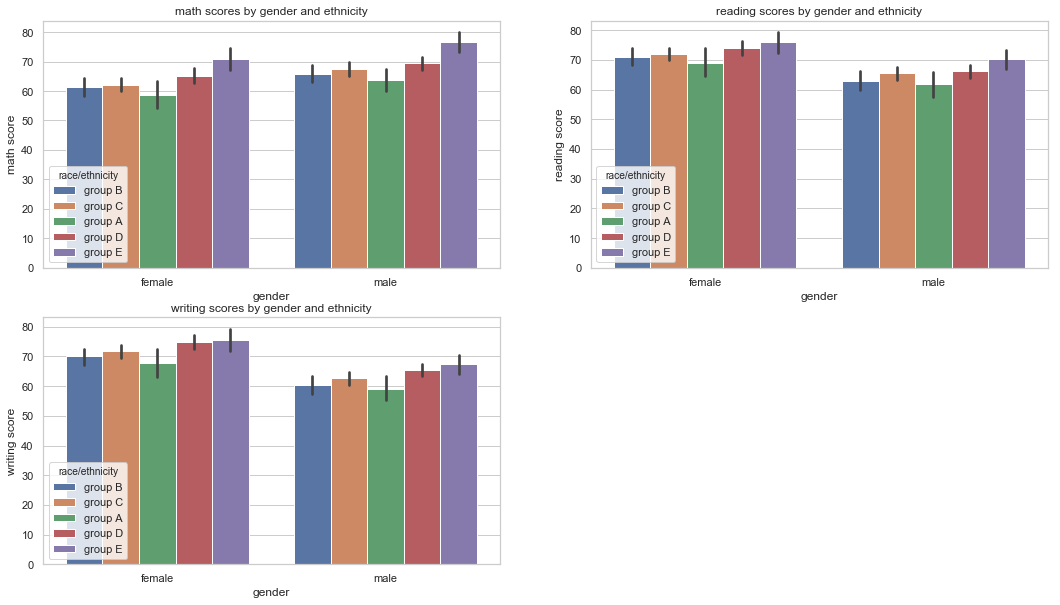

In [15]:
plt.figure(figsize=(18,10))

plt.subplot(2, 2, 1)
sns.barplot(x='gender', y='math score', data=students_df, hue='race/ethnicity')
plt.title('math scores by gender and ethnicity')

plt.subplot(2, 2, 2)
sns.barplot(x='gender', y='reading score', data=students_df, hue='race/ethnicity')
plt.title('reading scores by gender and ethnicity')

plt.subplot(2, 2, 3)
sns.barplot(x='gender', y='writing score', data=students_df, hue='race/ethnicity')
plt.title('writing scores by gender and ethnicity')

Group E has the highest scores across all 3 tests, followed by group D. Females score higher across all ethnicities on reading and writing, while males outperform across all ethnicities in math.

Text(0.5, 1.0, 'writing scores by gender and parental level of education')

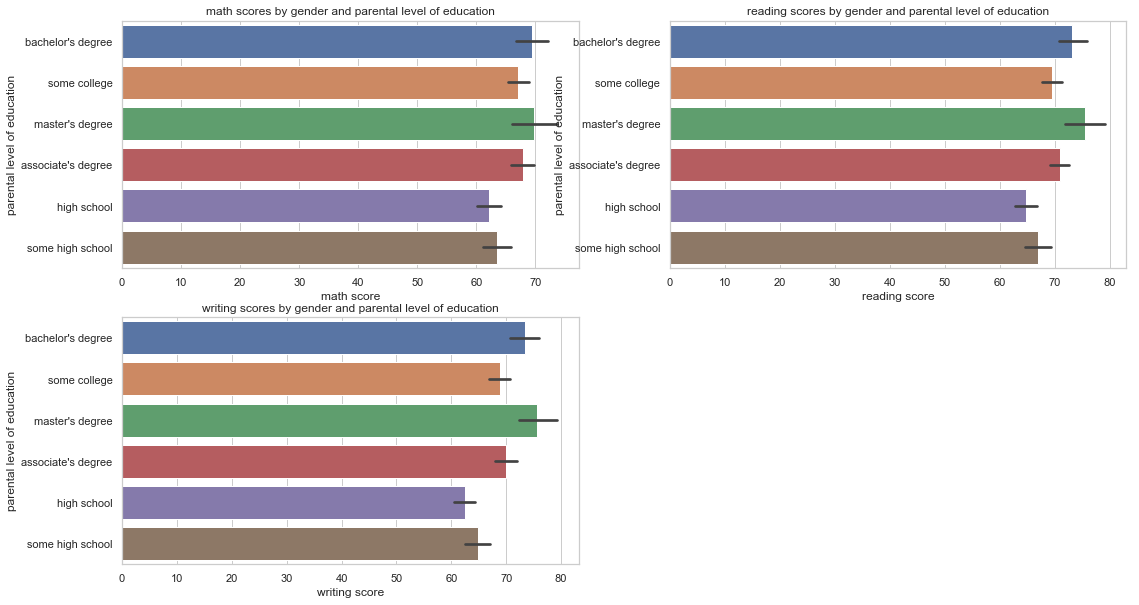

In [22]:
plt.figure(figsize=(18,10))

plt.subplot(2, 2, 1)
sns.barplot(y='parental level of education', x='math score', data=students_df)
plt.title('math scores by gender and parental level of education')

plt.subplot(2, 2, 2)
sns.barplot(y='parental level of education', x='reading score', data=students_df)
plt.title('reading scores by gender and parental level of education')

plt.subplot(2, 2, 3)
sns.barplot(y='parental level of education', x='writing score', data=students_df)
plt.title('writing scores by gender and parental level of education')

For all tests a higher level of parental education corresponds with a higher test score, except for 'high school' and 'some high school'.

## Q 2

Text(0.5, 1.0, 'writing scores by gender and parental level of education')

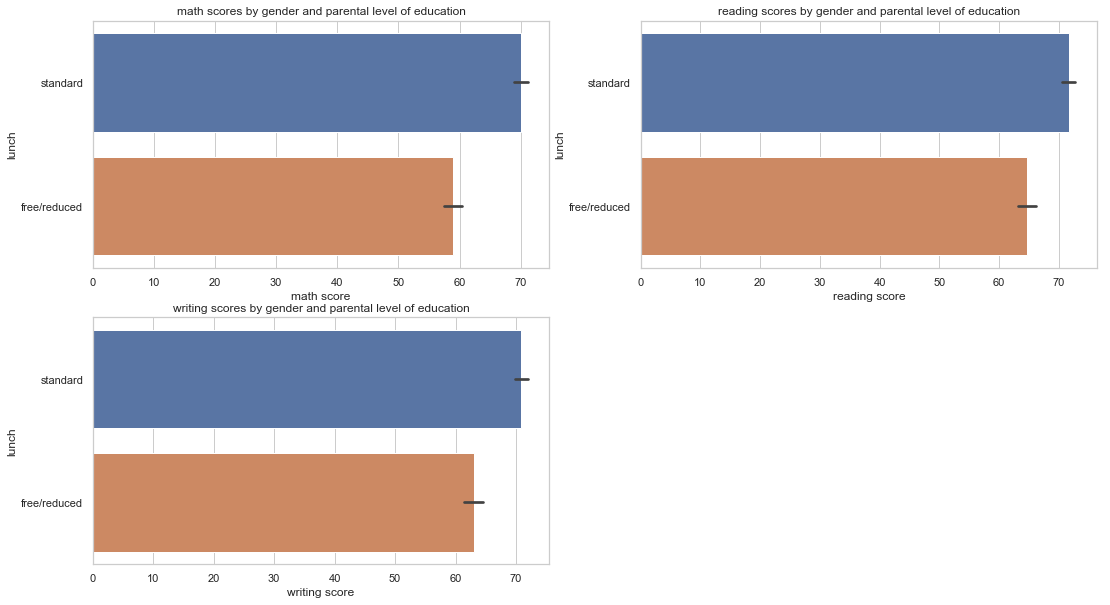

In [23]:
plt.figure(figsize=(18,10))

plt.subplot(2, 2, 1)
sns.barplot(y='lunch', x='math score', data=students_df)
plt.title('math scores by gender and parental level of education')

plt.subplot(2, 2, 2)
sns.barplot(y='lunch', x='reading score', data=students_df)
plt.title('reading scores by gender and parental level of education')

plt.subplot(2, 2, 3)
sns.barplot(y='lunch', x='writing score', data=students_df)
plt.title('writing scores by gender and parental level of education')

Kids with standard lunch have better scores on all tests. This is likely because we've already seen that higher parental education is correlated with higher scores and we know that higher education correlates with higher wages. Therefore the children receiving free or reduced lunches are likely disproportionately children of the least educated parents.

## Q 3

Text(0.5, 1.0, 'writing scores by gender and parental level of education')

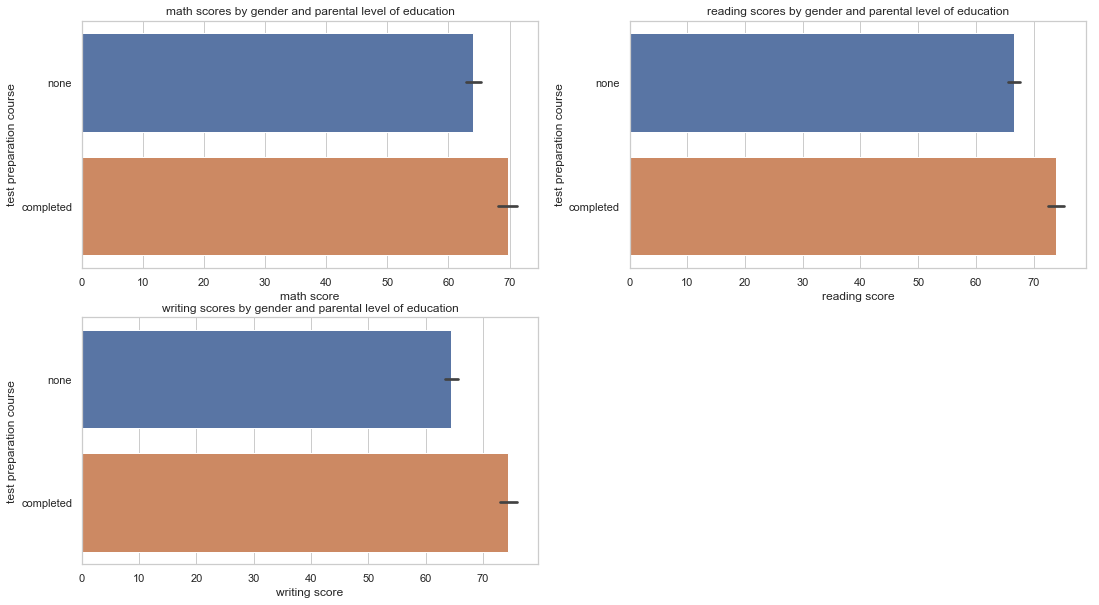

In [24]:
plt.figure(figsize=(18,10))

plt.subplot(2, 2, 1)
sns.barplot(y='test preparation course', x='math score', data=students_df)
plt.title('math scores by gender and parental level of education')

plt.subplot(2, 2, 2)
sns.barplot(y='test preparation course', x='reading score', data=students_df)
plt.title('reading scores by gender and parental level of education')

plt.subplot(2, 2, 3)
sns.barplot(y='test preparation course', x='writing score', data=students_df)
plt.title('writing scores by gender and parental level of education')

The prep course seems to have an effect, as those who completed a prep course outscore those who did not in every subject.

In [25]:
completed_df = students_df.loc[students_df['test preparation course'] == 'completed']

In [26]:
none_df = students_df.loc[students_df['test preparation course'] == 'none']

In [27]:
stats.ttest_ind(completed_df['math score'], none_df['math score'])

Ttest_indResult(statistic=5.704616417349102, pvalue=1.5359134607147415e-08)

In [28]:
stats.ttest_ind(completed_df['reading score'], none_df['reading score'])

Ttest_indResult(statistic=7.871663538941468, pvalue=9.081783336892205e-15)

In [29]:
stats.ttest_ind(completed_df['writing score'], none_df['writing score'])

Ttest_indResult(statistic=10.409173436808748, pvalue=3.68529173524572e-24)

The T tests confirm that these differences in scores are statistically significant.

## Q 4

In [30]:
students_df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


Reading and writing are most correlated with one another.